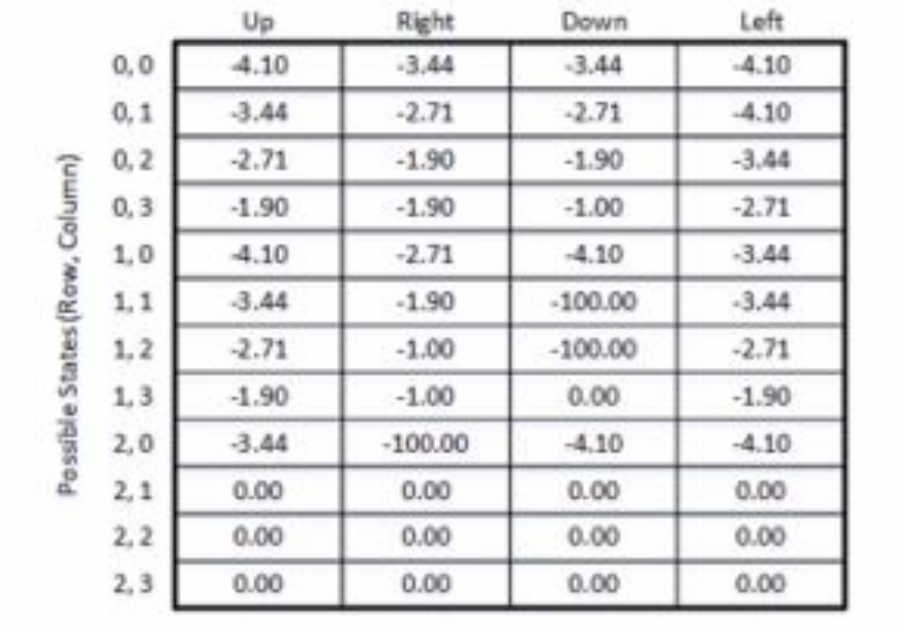

**what are TEMPORAL differences?**

1. Temporal difference (TDs) provide us with a method of calculating how much the Q-value for the action taken in the previous state should be changed based on what the AI agent has learnt about the Q-values for the current state's actions

    - previous Q-values are therefore updated after each step

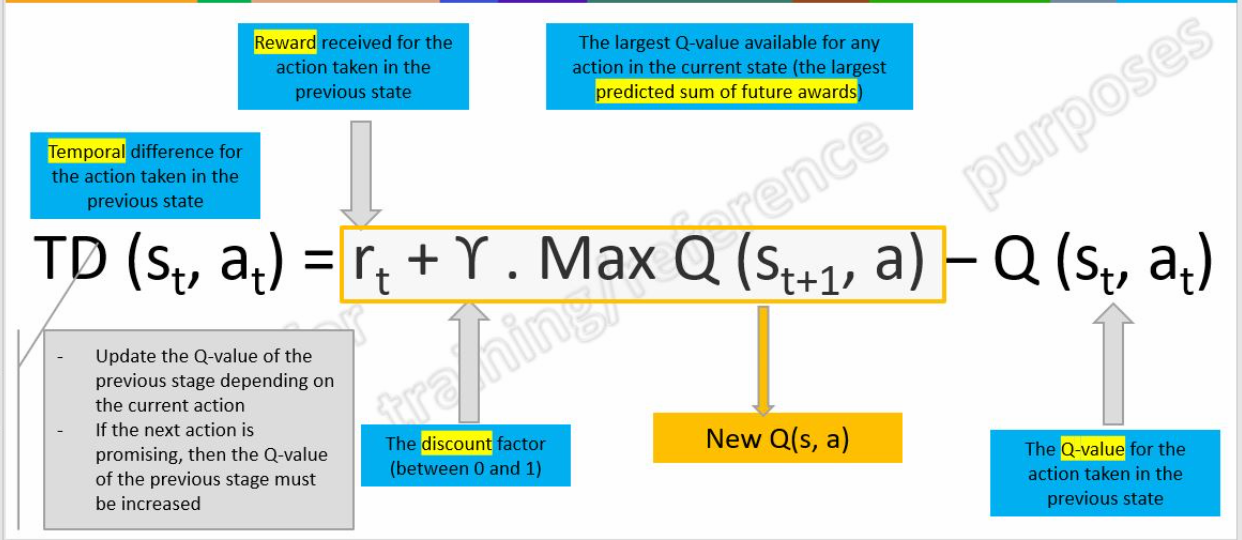

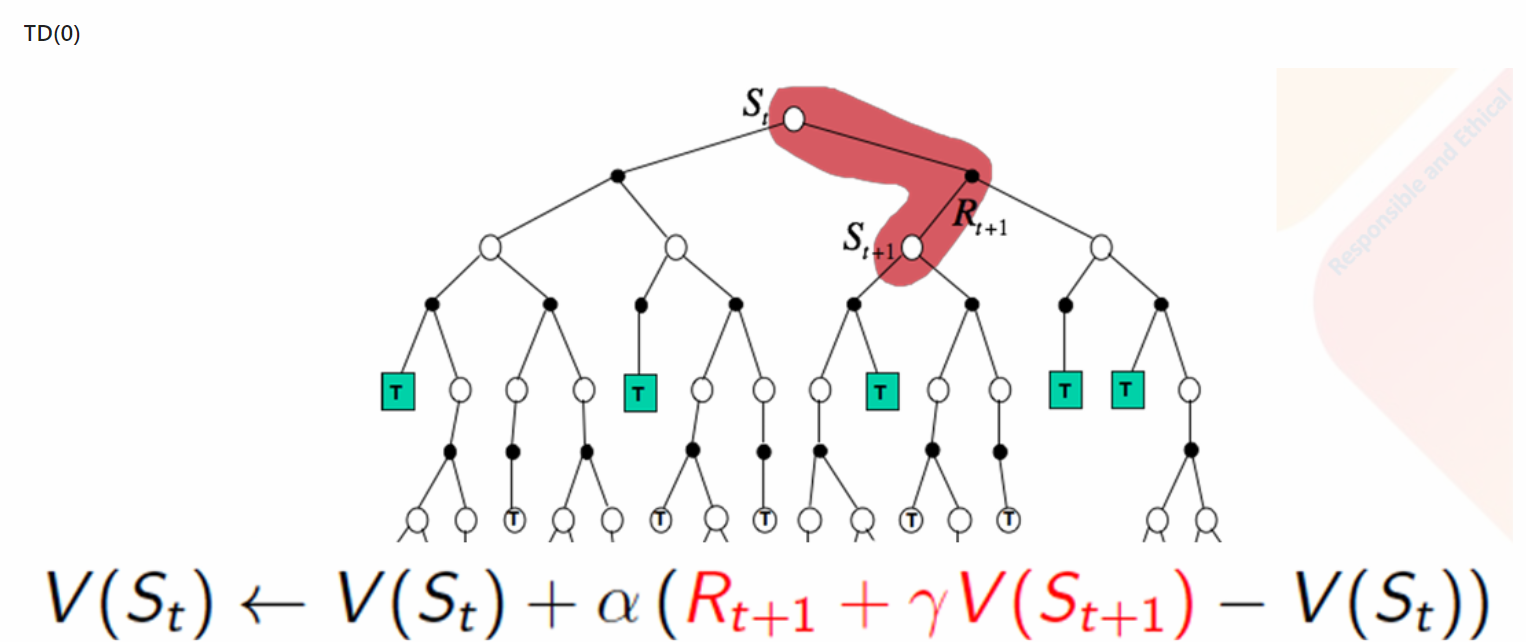

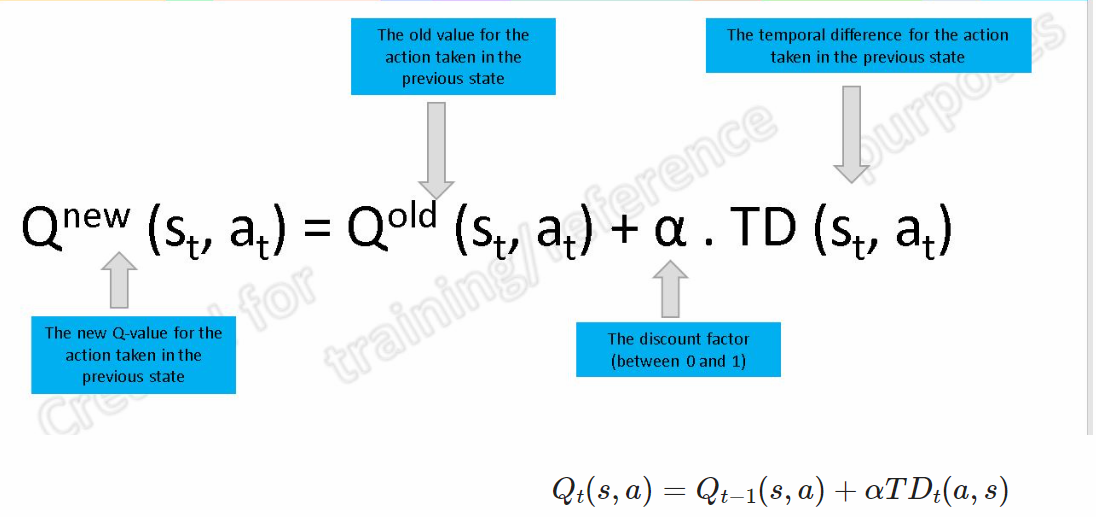

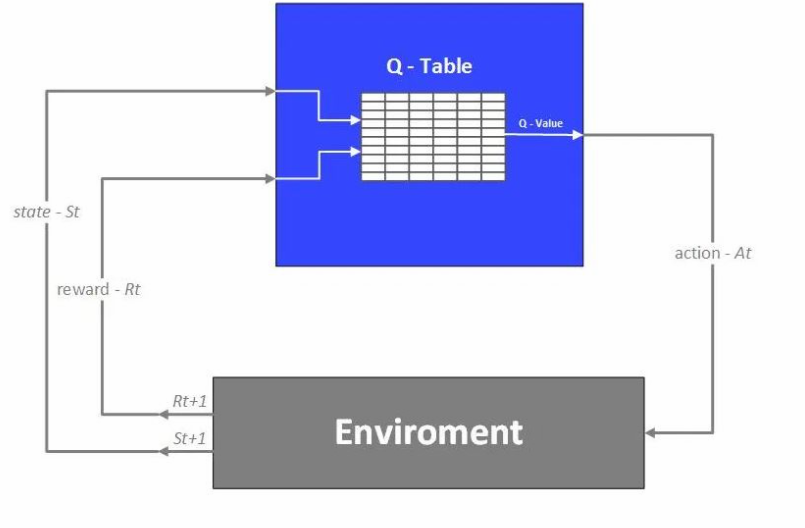

#### Example 01 (how Q learning will work out in a loop)

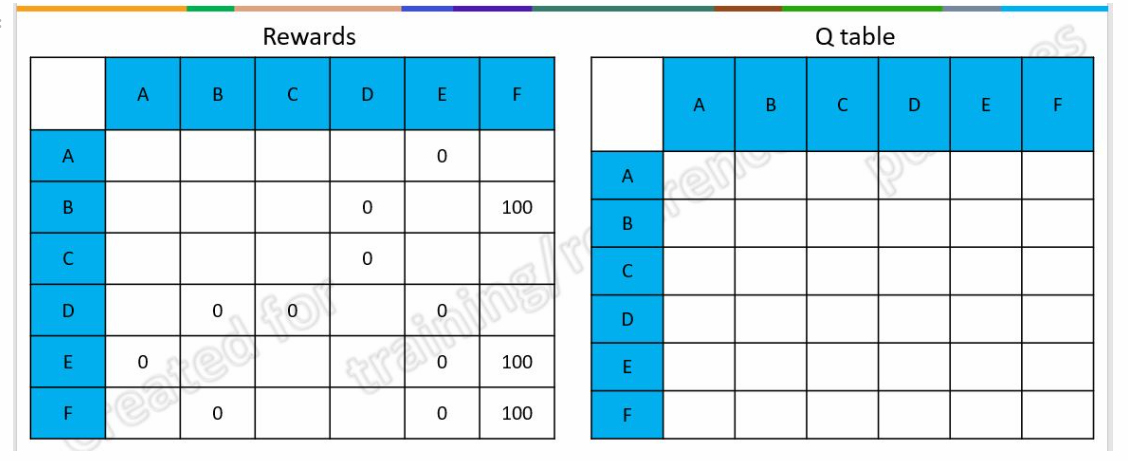

- `Agent` Starts at `state B`
  - Agent needs to decide the `next state`
  - R table, for state B, shows 2 possible moves (`D` and `F`)
  - let us say we do random selection; we select `F`
      - look at the rewards table for state F,
          - 3 possible actions `B`, `E`, `F`
              

$$ \large Q(s_t, a_t) = R_{t+1} + \gamma.Q(s_{t+1}, a_{t+1})$$

$$ \large a_{t+1} = a_{t+1} : Q(s_{t+1}, a_{t+1}) = \text{max}(Q(s_{t+1})) $$

so the first equation can be written as 

$$ \large Q(s_t, a_t) = R_{t+1} + \gamma.\text{max}(Q(s_{t+1}))$$

$$ \large 
\begin{aligned} 
Q(B, F) &= R(B, F) + \gamma.\text{max}[Q(F, B), (Q(F, E), Q(F, F)] \\
                                  &= 100 + 0.8 * 0 \\
                                  &= 100
\end{aligned} 
$$


- Next state is `F`
    - this is the END state
        - `EPISODE` is over
- for the next episode,
    - we start with initial random state
        - Say the agent starts with `D` as the initial state
            - we look at the rewards table
                - 3 possible actions `B`, `C` & `E`
                - random selection 
                    - say it is `B`
                    - Now we are in state B
                        - Rewards table says 2 possible actions
                            - D and F
                            
                        - compute the Q value
                    
$$ \large 
\begin{aligned} 
Q(D, B) &= R(D, D) + \gamma.\text{max}[Q(B, D), (Q(B, F)] \\
      &= 0 + 0.8 * \text{max}(0, 100) \\
      &= 0 + 0.8 * 100 \\
      &= 80
\end{aligned} 
$$

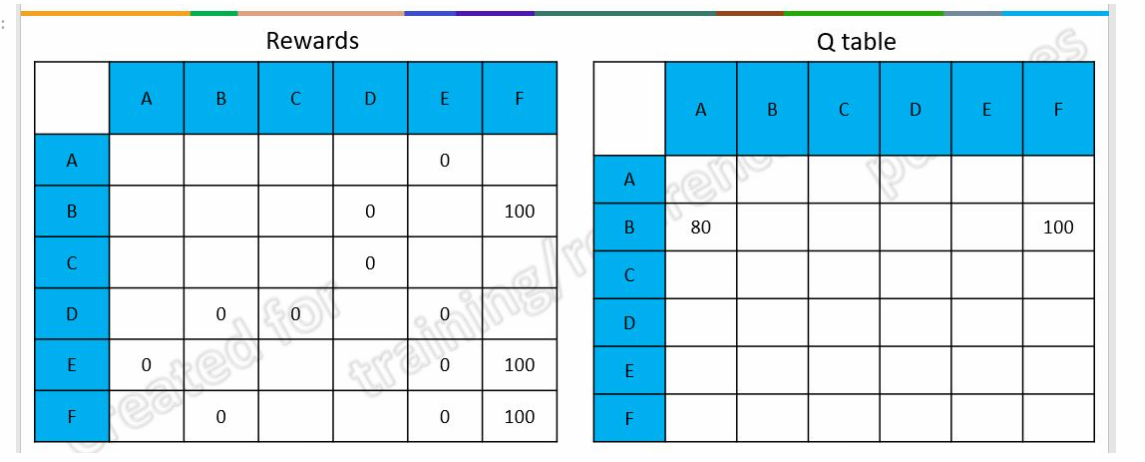

#### Python implementation

A growing e-commerce company is building a new warehouse, and the company would like all of the picking operations in the new warehouse to be performed by warehouse robots.

In the context of e-commerce warehousing, “picking” is the task of gathering individual items from various locations in the warehouse in order to fulfill customer orders.
After picking items from the shelves, the robots must bring the items to a specific location within the warehouse where the items can be packaged for shipping.

In order to ensure maximum efficiency and productivity, the robots will need to learn the shortest path between the item packaging area and all other locations within the warehouse where the robots are allowed to travel.

We will use Q-learning to accomplish this task!

In [1]:
import numpy as np
np.set_printoptions(linewidth=120)

#### Define the Environment
The __environment__ consists of 
- __states__, 
- __actions__, and 
- __rewards__. 

__States__ and __actions__ are inputs for the __Q-learning__ AI agent, while the possible __actions__ are the AI agent's outputs.

#### 1. States
The states in the environment are all of the possible locations within the warehouse. 

-Some of these locations are for storing items (__black squares__), 
- while other locations are aisles that the robot can use to travel throughout the warehouse (__white squares__). 
- The __green square__ indicates the item packaging and shipping area.

The __black__ and __green__ squares are terminal states!


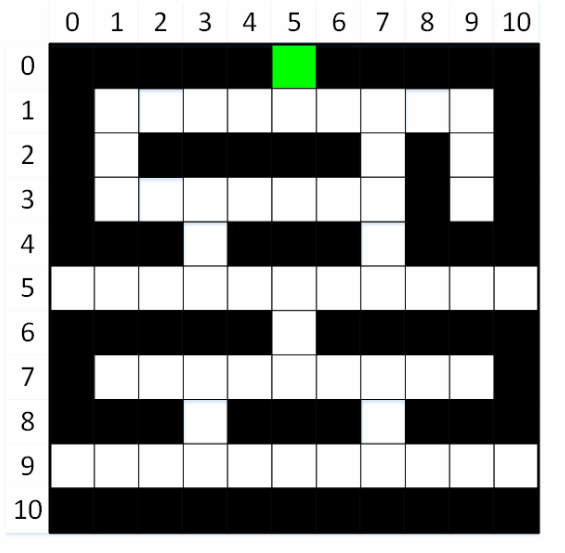

The AI agent's goal is to learn the shortest path between the item packaging area and all of the other locations in the warehouse where the robot is allowed to travel.

As shown in the image above, there are 121 possible states (locations) within the warehouse. These states are arranged in a grid containing 11 rows and 11 columns. 

Each location can hence be identified by its row and column index.

In [3]:
# define the shape of the environment (i.e., its states)
environment_rows    = 11
environment_columns = 11

# Create a 3D numpy array to hold the current Q-values for each state and action pair: Q(s, a) 
# The array contains 11 rows and 11 columns (to match the shape of the environment), as well as a third "action" dimension.
# The "action" dimension consists of 4 layers that will allow us to keep track of the Q-values for each possible action in
# each state (see next cell for a description of possible actions). 
# The value of each (state, action) pair is initialized to 0.

q_values = np.zeros((environment_rows, environment_columns, 4))

In [5]:
#q_values

In [6]:
q_values.shape

(11, 11, 4)

#### 2. Actions
The actions that are available to the AI agent are to move the robot in one of four directions:

- Up
- Right
- Down
- Left

Obviously, the AI agent must learn to avoid driving into the item storage locations (e.g., shelves)!

In [7]:
# define actions
# numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

#### 3. Rewards
The last component of the environment that we need to define are the __rewards__.

To help the AI agent learn, each state (location) in the warehouse is assigned a reward value.

The agent may begin at any white square, but its goal is always the same: to maximize its total rewards!

Negative rewards (i.e., punishments) are used for all states except the goal.

This encourages the AI to identify the shortest path to the goal by minimizing its punishments!

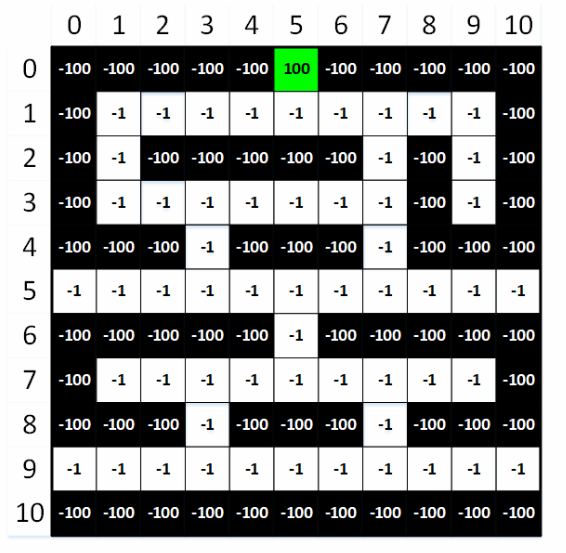

To maximize its cumulative rewards (by minimizing its cumulative punishments), the AI agent will need find the shortest paths between the item packaging area (__green__ square) and all of the other locations in the warehouse where the robot is allowed to travel (__white__ squares). 

The agent will also need to learn to avoid crashing into any of the item storage locations (__black__ squares)!

In [8]:
rewards = np.full((environment_rows, environment_columns), -100.)
rewards

array([[-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
       [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100., -100.]])

In [9]:
# set the reward for the packaging area (i.e., the goal) to 100
rewards[0, 5] = 100. 

In [10]:
# define aisle locations (i.e., white squares) for rows 1 through 9
aisles = {} # store locations in a dictionary

aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

In [11]:
# set the rewards for all aisle locations (i.e., white squares)
for row_index in range(1, 10):
    for column_index in aisles[row_index]:
        rewards[row_index, column_index] = -1.

In [12]:
# print rewards matrix
for row in rewards:
    print(row)

[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]


#### train the agent using Q-learning

In [13]:
# define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
    
  # if the reward for this location is -1, then it is not a terminal state (i.e., it is a 'white square')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

In [14]:
# define a function that will choose a random, non-terminal starting location
def get_starting_location():
    
    # get a random row and column index
    current_row_index    = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
    
    # continue choosing random row and column indexes until a non-terminal state is identified
    # (i.e., until the chosen state is a 'white square').
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index    = np.random.randint(environment_rows)
        current_column_index = np.random.randint(environment_columns)
        
    return current_row_index, current_column_index

In [15]:
# define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon):
    
    # if a randomly chosen value between 0 and 1 is less than epsilon, 
    # then choose the most promising value from the Q-table for this state.
    
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else: # choose a random action
        return np.random.randint(4)

In [16]:
# define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index    = current_row_index
    new_column_index = current_column_index
    
    if actions[action_index]   == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

In [17]:
# define training parameters
epsilon         = 0.9 # the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 # discount factor for future rewards
learning_rate   = 0.9 # the rate at which the AI agent should learn

# run through 1000 training episodes
for episode in range(1000):
    
    # get the starting location for this episode
    row_index, column_index = get_starting_location()

    # continue taking actions (i.e., moving) until we reach a terminal state
    # (i.e., until we reach the item packaging area or crash into an item storage location)
    while not is_terminal_state(row_index, column_index):
        
        # choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)

        # perform the chosen action, and transition to the next state (i.e., move to the next location)
        old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)

        # receive the reward for moving to the new state, and calculate the temporal difference
        reward      = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value  

        # update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        
        q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

Training complete!
